In [1]:
import json
import pandas as pd

N = 10
thread_counts = ["1", "2", "4", "8"]
builds = ["parallel"]
schedules = ["dynamic", "static", "guided"]
chunk_sizes = ["1","2","4","8","16","32","64","128","256","512","1024","2048","4096","8192"]
bounds = [100_000, 500_000, 1_000_000,1_500_000,2_000_000]
with open('results.json', 'r') as f:
    results = json.load(f)
    

In [2]:
# t_n is the time elapsed using n threads, s_n is the speedup using n threads compared to serial
header = ["bound", "build", "chunk_size", "t1", "t2", "t4", "t8", "s2", "s4", "s8" ]
speedupds = ["2", "4", "8"]

with open("r.csv", "w") as f:
    f.write(",".join(header) + "\n")
    build = "serial"
    chunk_size = "1"
    schedule = "static"
    thread_count = "1"
    for bound in bounds:
        # don't use the df, use the results directly
        row = [bound, build, chunk_size]
        for thread_count in thread_counts[1:]:
            row.append(results[build]["1"][schedule][chunk_size][str(bound)]["avg_elapsed"])
        for speedupd in speedupds:
            row.append(0.0)
        f.write(",".join([str(x) for x in row]) + "\n")

with open("r.csv", "a") as f:
    for build in builds:
        for bound in bounds:
            for schedule in schedules:
                for chunk_size in chunk_sizes:
                        row = [bound, build, chunk_size]
                        # row = [bound, build, chunk_size, "t1", "t2", "t4", "t8", "s2", "s4", "s8]
                        serial_result = results["serial"]["1"]["static"]["1"][str(bound)]["avg_elapsed"]
                        # don't use the df, use the results directly
                        for thread_count in thread_counts:
                            row.append(results[build][thread_count][schedule][chunk_size][str(bound)]["avg_elapsed"])
                        for i in range(len(thread_counts) - 1):
                            row.append(serial_result / row[4 + i])
                        f.write(",".join([str(x) for x in row]) + "\n")


In [3]:
df = pd.read_csv("r.csv")

<Axes: title={'center': 'Speedup vs. Bound'}, xlabel='Bound', ylabel='Speedup'>

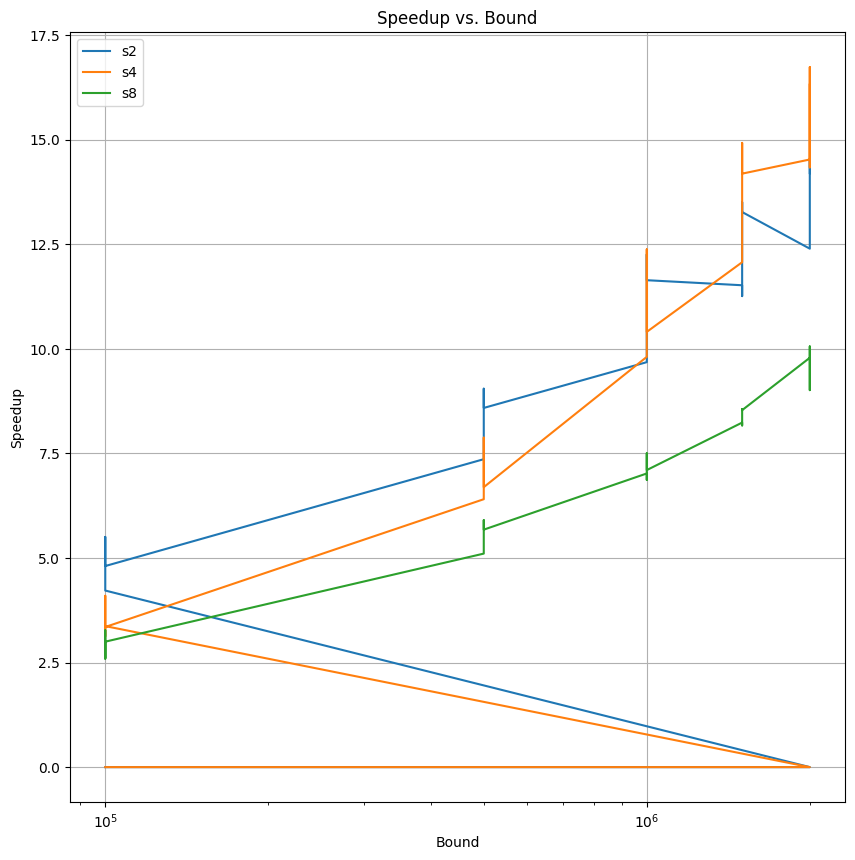

In [4]:
df.plot(x="bound", y=["s2", "s4", "s8"], title="Speedup vs. Bound", xlabel="Bound", ylabel="Speedup", logx=True, grid=True, figsize=(10,10))